## The input beam file should be 6-column (x, x', y, y', z, delta)
## Please note that z>0 for the beam head

### Make beam file from distgen

In [1]:
from distgen import Generator
import numpy as np
import matplotlib.pyplot as plt


In [2]:
filename = './input//fodo_init_beam.yaml'
gen = Generator(filename)
gen.run()
pg = gen.particles
gamma = pg.gamma
delta = (gamma - np.mean(gamma))/np.mean(gamma)
particles = np.vstack((pg.x, pg.xp, pg.y, pg.yp, pg.z, delta)).T
charge = pg['charge']
init_energy = np.mean(pg['energy'])

In [4]:
pg.twiss('x')

{'alpha_x': 2.058003663869459e-09,
 'beta_x': 15.800000231573694,
 'gamma_x': 0.06329113831287579,
 'emit_x': 1.0000009851164434e-10,
 'eta_x': -6.001664890904328e-06,
 'etap_x': -2.001713905453239e-07,
 'norm_emit_x': 9.784765556987662e-07}

In [ ]:
np.savetxt('./input_beam/dipole_beam.dat', particles)


In [4]:
charge

9.999999999999982e-10

In [5]:
init_energy/1e9

5.000000026236993

### Make pyDFCSR beam from Lucretia h5 file

In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

In [2]:
with h5py.File("/sdf/data/ad/ard/u/jytang/pyDFCSR/facet_dipole_output/input_beam/preB1LE1_lucretiaLSC", "r") as f:
    x = np.array(f['x'])
    xp = np.array(f['xp'])
    y = np.array(f['y'])
    yp = np.array(f['yp'])
    z = np.array(f['z'])
    E = np.array(f['G'])*1e9
    E0 = np.mean(E)
    delta = (E -E0)/E0

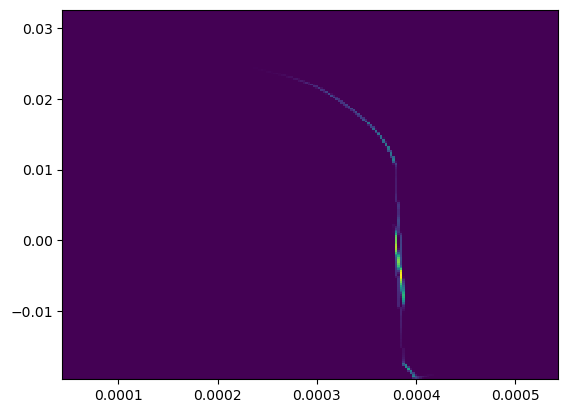

In [3]:
fig =plt.hist2d(z, delta, bins = 200)

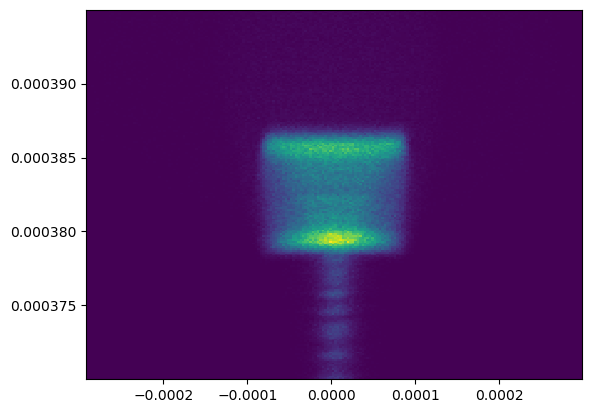

In [4]:
ind = (xp >-0.00005)&(z>0.00037) &(z < 0.000395)
fig =plt.hist2d(x[ind], z[ind], bins = 200)

In [5]:
x1 = x[ind]
xp1 = xp[ind]
y1 = y[ind]
yp1 = yp[ind]
z1 = z[ind]
E1= E[ind]
E0 = np.mean(E1)
delta1 = (E1 - E0)/E0

In [6]:
# z > 0 for beam head

z1 *=-1
z1 -= np.mean(z1)

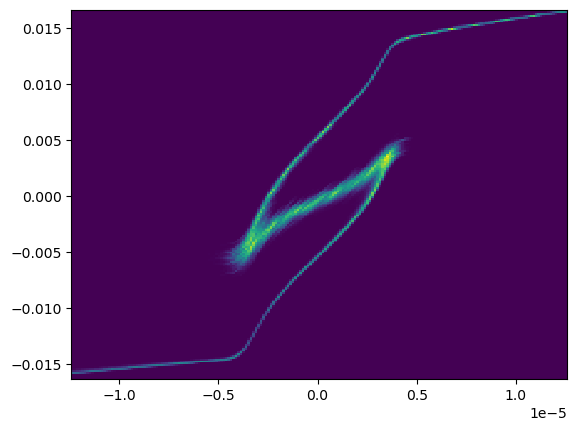

In [7]:
fig =plt.hist2d(z1, delta1, bins = 200)

In [8]:
particles = np.vstack((x1, xp1, y1, yp1, z1, delta1)).T

In [9]:
np.savetxt('/sdf/data/ad/ard/u/jytang/pyDFCSR/facet_dipole_output/input_beam/preB1LE1_lucretiaLSC.dat', particles)

In [10]:
E0/1e9

9.856183815374736

## Convert matlab input beam to python input beam

In [4]:
data = np.loadtxt('./input_beam/facetii_B4.csr', delimiter=',')

In [7]:
gam = data[:,5]

In [8]:
gam0 = np.mean(gam)

In [9]:
gam0

19581.902339620297

In [10]:
#convert gamma to delta
data[:,5] = (data[:,5] - gam0)/gam0

In [12]:
# change the sign of z so z> 0 for bunch head
data[:, 4] *=-1

In [13]:
x = data[:,0]
z = data[:,4]
delta = data[:, 5]
xp = data[:, 1]

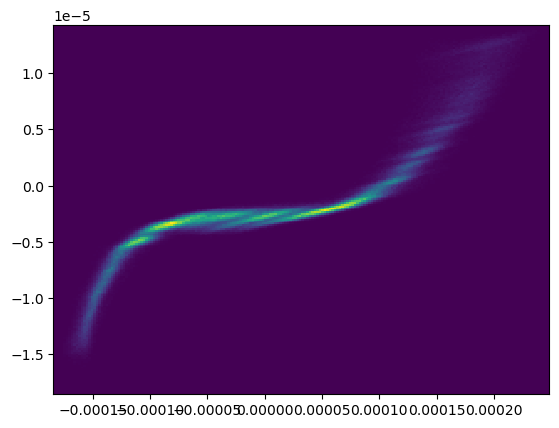

In [14]:
fig =plt.hist2d(x, z, bins = 200)

In [15]:
np.savetxt('./input_beam/facetii_B4.dat', data)